In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import datasets
data= pd.read_csv(r"./dataset/diabetes.csv") # 당뇨병 데이터셋 불러오기
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies: 임신 횟수 \
Glucose: 혈장 포도당 농도 \
BloodPressure: 혈압 \
SkinThickness: 삼두근 피부 주름 두께 \
Insulin: 인슐린 \
BMI: 체질량 지수 \
DiabetesPedigreeFunction: 당뇨병 혈통 기능 \
Age: 나이 \

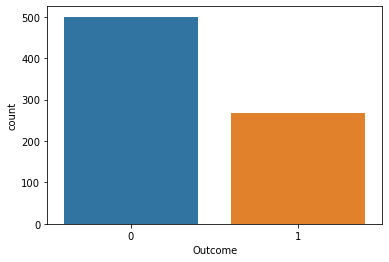

In [3]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count") # 0: 당뇨병 없음, 1: 당뇨병 있음

In [4]:
X = data.loc[:,data.columns != 'Outcome']
Y = data['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size = 0.25, random_state = 0)

In [7]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [8]:
Y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

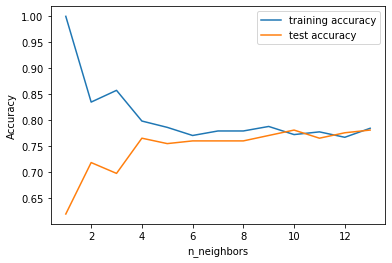

In [9]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 14)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.77
